In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

In [4]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [5]:
#area is independent feature, x
#rent is dept. y
x = df['area']
y = df['rent']

In [6]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [7]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Least Square Method

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
mean_x

2289.0

In [10]:
df.area.mean()

2289.0

In [11]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

In [12]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [13]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

# Equations

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

# slope

In [14]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

In [15]:
m

21.292661473611954

In [16]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [17]:
df.tail(1)

,area,rent
59,3100,51600


# Intercept, c

In [18]:
c = mean_y - m*mean_x

In [19]:
c

-11469.7354464311

In [20]:
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 21.292661473611954
Intercept (c): -11469.7354464311


# SKlean

In [21]:
from sklearn.linear_model import LinearRegression 

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(df[['area']], y)

LinearRegression()

In [24]:
reg.coef_

array([21.29266147])

In [25]:
m

21.292661473611954

In [26]:
reg.intercept_

-11469.735446431114

In [27]:
c

-11469.7354464311

In [28]:
reg.predict([[2000]])

array([31115.58750079])

# Formal Work

Text(0.5, 1.0, 'area-rent visualization')

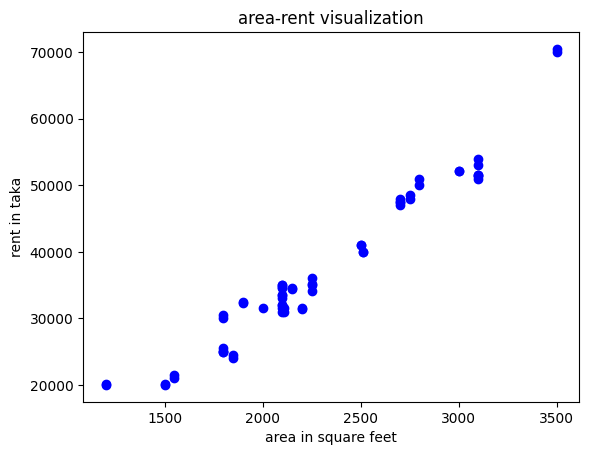

In [29]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

# Data Split

In [30]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.drop('rent', axis=1) # 1 for col and 0 for rows ; df[['area']] 
y = df[['rent']]

In [33]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [34]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.30)

In [36]:
xtrain.head() # 70% data

,area
19,2700
11,2100
58,2200
33,2250
35,1900


In [37]:
ytrain.head()

,rent
19,47000
11,32000
58,31560
33,35100
35,32300


In [38]:
xtest.head()

,area
8,2700
16,1800
13,2510
48,1800
28,2200


In [39]:
xtest.shape

(18, 1)

In [40]:
xtrain.shape


(42, 1)

In [41]:
reg.fit(xtrain, ytrain) # training ml model with train data

LinearRegression()

In [42]:
reg.predict(xtest) #input area and it will return predicted rent

array([[46085.77737688],
       [26745.90316717],
       [42002.91504372],
       [26745.90316717],
       [35341.40281593],
       [21373.7158867 ],
       [47160.21483298],
       [33192.52790374],
       [33192.52790374],
       [34266.96535984],
       [27820.34062327],
       [46085.77737688],
       [13852.65369403],
       [26745.90316717],
       [47160.21483298],
       [42002.91504372],
       [33192.52790374],
       [26745.90316717]])

In [43]:
ytest.head()

,rent
8,48000
16,30500
13,40050
48,25500
28,31460


In [44]:
ytest['predicted_y'] = reg.predict(xtest)

In [45]:
ytest.head()

,rent,predicted_y
8,48000,46085.777377
16,30500,26745.903167
13,40050,42002.915044
48,25500,26745.903167
28,31460,35341.402816


In [46]:
len(ytest)

18

In [47]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [48]:
ytest.head()

,rent
8,48000
16,30500
13,40050
48,25500
28,31460


In [49]:
#training score
reg.score(xtrain, ytrain)

0.9526209098839162

In [50]:
#testing accuracy
reg.score(xtest, ytest)

0.9309284008299981

# MSE & MAE

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [53]:
mse

5960112.420212356

In [54]:
mean_absolute_error(ytest, reg.predict(xtest))

1936.1962553866624

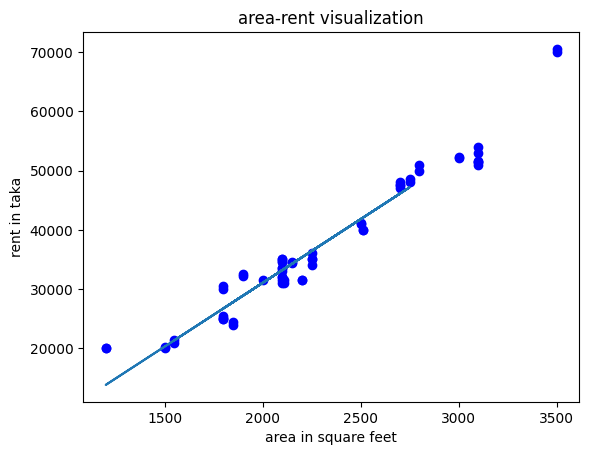

In [55]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))

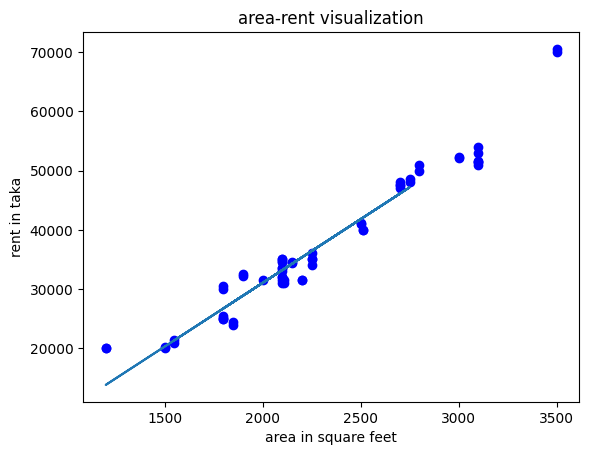

In [56]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))